In [1]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

class BinaryImageDataset(Dataset):
    def __init__(self, class_dir, non_class_dir, transform=None):
        """
        Args:
            class_dir (string): Directory with the images of the class.
            non_class_dir (string): Directory with the non-class images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.class_images = [os.path.join(class_dir, file) for file in os.listdir(class_dir)]
        self.non_class_images = [os.path.join(non_class_dir, file) for file in os.listdir(non_class_dir)]
        self.total_images = self.class_images + self.non_class_images
        self.labels = [1] * len(self.class_images) + [0] * len(self.non_class_images)
        self.transform = transform

    def __len__(self):
        return len(self.total_images)

    def __getitem__(self, idx):
        img_name = self.total_images[idx]
        image = Image.open(img_name)
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(degrees=30),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.4),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomGrayscale(p=0.2),
    transforms.RandomVerticalFlip(p=0.4),
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=10),
    transforms.RandomPosterize(bits=2, p=0.2),
    transforms.ToTensor(),
    transforms.RandomErasing(p=0.2, scale=(0.02, 0.33), ratio=(0.3, 3.3)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


# Assuming you have a folder for your class images and a folder for non-class images
dataset = BinaryImageDataset(class_dir='/kaggle/input/nnnnnn/open', 
                             non_class_dir='/kaggle/input/nnnnnn/close', 
                             transform=transform)

dataloader = DataLoader(dataset, batch_size=32, shuffle=True)




In [2]:
from torch.utils.data import random_split, DataLoader
from torch.utils.data.dataloader import default_collate
# Determine the size of the training and testing sets
train_size = int(0.8 * len(dataset))  # 80% for training
test_size = len(dataset) - train_size  # 20% for testing

# Split the dataset
train_set, test_set = random_split(dataset, [train_size, test_size])


# Create DataLoader for training and testing sets with custom collate function
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = DataLoader(test_set, batch_size=32, shuffle=True)

In [3]:
len(dataloader)

121

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader
import time

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


model.safetensors:   0%|          | 0.00/21.8M [00:00<?, ?B/s]

Training:   0%|          | 1/200 [01:10<3:53:51, 70.51s/epoch]

Epoch 1/200, Train Loss: 0.4577, Val Loss: 0.9088, Train Accuracy: 0.7661, Test Accuracy: 0.6705


Training:   1%|          | 2/200 [02:07<3:26:02, 62.44s/epoch]

Epoch 2/200, Train Loss: 0.3736, Val Loss: 0.4779, Train Accuracy: 0.8381, Test Accuracy: 0.8062


Training:   2%|▏         | 3/200 [03:03<3:16:03, 59.71s/epoch]

Epoch 3/200, Train Loss: 0.3411, Val Loss: 0.3707, Train Accuracy: 0.8520, Test Accuracy: 0.8165


Training:   2%|▏         | 4/200 [04:00<3:10:57, 58.46s/epoch]

Epoch 4/200, Train Loss: 0.3198, Val Loss: 0.3480, Train Accuracy: 0.8627, Test Accuracy: 0.8424


Training:   2%|▎         | 5/200 [04:56<3:07:21, 57.65s/epoch]

Epoch 5/200, Train Loss: 0.3114, Val Loss: 0.3930, Train Accuracy: 0.8685, Test Accuracy: 0.8165


Training:   3%|▎         | 6/200 [05:53<3:05:57, 57.51s/epoch]

Epoch 6/200, Train Loss: 0.2844, Val Loss: 0.3779, Train Accuracy: 0.8792, Test Accuracy: 0.8333


Training:   4%|▎         | 7/200 [06:50<3:03:54, 57.18s/epoch]

Epoch 7/200, Train Loss: 0.2835, Val Loss: 0.3302, Train Accuracy: 0.8805, Test Accuracy: 0.8579


Training:   4%|▍         | 8/200 [07:46<3:02:03, 56.89s/epoch]

Epoch 8/200, Train Loss: 0.2553, Val Loss: 0.2806, Train Accuracy: 0.8966, Test Accuracy: 0.8773


Training:   4%|▍         | 9/200 [08:43<3:00:45, 56.79s/epoch]

Epoch 9/200, Train Loss: 0.2627, Val Loss: 0.3112, Train Accuracy: 0.8879, Test Accuracy: 0.8553


Training:   5%|▌         | 10/200 [09:39<2:59:48, 56.78s/epoch]

Epoch 10/200, Train Loss: 0.2453, Val Loss: 0.2521, Train Accuracy: 0.8989, Test Accuracy: 0.8941


Training:   6%|▌         | 11/200 [10:36<2:58:38, 56.71s/epoch]

Epoch 11/200, Train Loss: 0.2430, Val Loss: 0.2576, Train Accuracy: 0.8973, Test Accuracy: 0.8837


Training:   6%|▌         | 12/200 [11:33<2:57:42, 56.71s/epoch]

Epoch 12/200, Train Loss: 0.2314, Val Loss: 0.2741, Train Accuracy: 0.9047, Test Accuracy: 0.8850


Training:   6%|▋         | 13/200 [12:30<2:56:55, 56.77s/epoch]

Epoch 13/200, Train Loss: 0.2288, Val Loss: 0.2745, Train Accuracy: 0.9040, Test Accuracy: 0.8902


Training:   7%|▋         | 14/200 [13:26<2:55:27, 56.60s/epoch]

Epoch 14/200, Train Loss: 0.2277, Val Loss: 0.2665, Train Accuracy: 0.9021, Test Accuracy: 0.8941


Training:   8%|▊         | 15/200 [14:22<2:54:07, 56.47s/epoch]

Epoch 15/200, Train Loss: 0.2181, Val Loss: 0.2487, Train Accuracy: 0.9060, Test Accuracy: 0.9018


Training:   8%|▊         | 16/200 [15:19<2:53:54, 56.71s/epoch]

Epoch 16/200, Train Loss: 0.2135, Val Loss: 0.2553, Train Accuracy: 0.9089, Test Accuracy: 0.8992


Training:   8%|▊         | 17/200 [16:16<2:52:54, 56.69s/epoch]

Epoch 17/200, Train Loss: 0.2126, Val Loss: 0.2348, Train Accuracy: 0.9118, Test Accuracy: 0.8992


Training:   9%|▉         | 18/200 [17:12<2:51:53, 56.67s/epoch]

Epoch 18/200, Train Loss: 0.2039, Val Loss: 0.2442, Train Accuracy: 0.9131, Test Accuracy: 0.9005


Training:  10%|▉         | 19/200 [18:10<2:51:43, 56.92s/epoch]

Epoch 19/200, Train Loss: 0.2149, Val Loss: 0.2184, Train Accuracy: 0.9121, Test Accuracy: 0.9031


Training:  10%|█         | 20/200 [19:08<2:51:44, 57.25s/epoch]

Epoch 20/200, Train Loss: 0.2027, Val Loss: 0.2468, Train Accuracy: 0.9144, Test Accuracy: 0.9031


Training:  10%|█         | 21/200 [20:04<2:49:52, 56.94s/epoch]

Epoch 21/200, Train Loss: 0.1882, Val Loss: 0.2125, Train Accuracy: 0.9234, Test Accuracy: 0.9276


Training:  11%|█         | 22/200 [21:01<2:48:47, 56.90s/epoch]

Epoch 22/200, Train Loss: 0.1912, Val Loss: 0.2113, Train Accuracy: 0.9183, Test Accuracy: 0.9121


Training:  12%|█▏        | 23/200 [21:57<2:47:14, 56.69s/epoch]

Epoch 23/200, Train Loss: 0.1989, Val Loss: 0.2236, Train Accuracy: 0.9202, Test Accuracy: 0.9057


Training:  12%|█▏        | 24/200 [22:53<2:45:55, 56.57s/epoch]

Epoch 24/200, Train Loss: 0.1877, Val Loss: 0.2103, Train Accuracy: 0.9208, Test Accuracy: 0.9238


Training:  12%|█▎        | 25/200 [23:50<2:44:37, 56.44s/epoch]

Epoch 25/200, Train Loss: 0.1924, Val Loss: 0.1937, Train Accuracy: 0.9221, Test Accuracy: 0.9251


Training:  13%|█▎        | 26/200 [24:46<2:43:53, 56.52s/epoch]

Epoch 26/200, Train Loss: 0.1793, Val Loss: 0.2029, Train Accuracy: 0.9247, Test Accuracy: 0.9121


Training:  14%|█▎        | 27/200 [25:43<2:42:49, 56.47s/epoch]

Epoch 27/200, Train Loss: 0.1788, Val Loss: 0.2785, Train Accuracy: 0.9273, Test Accuracy: 0.8966


Training:  14%|█▍        | 28/200 [26:39<2:41:45, 56.43s/epoch]

Epoch 28/200, Train Loss: 0.1760, Val Loss: 0.2134, Train Accuracy: 0.9328, Test Accuracy: 0.9070


Training:  14%|█▍        | 29/200 [27:35<2:40:46, 56.41s/epoch]

Epoch 29/200, Train Loss: 0.1674, Val Loss: 0.1944, Train Accuracy: 0.9321, Test Accuracy: 0.9160


Training:  15%|█▌        | 30/200 [28:31<2:39:29, 56.29s/epoch]

Epoch 30/200, Train Loss: 0.1608, Val Loss: 0.1992, Train Accuracy: 0.9328, Test Accuracy: 0.9160


Training:  16%|█▌        | 31/200 [29:28<2:39:01, 56.46s/epoch]

Epoch 00031: reducing learning rate of group 0 to 1.5000e-04.
Epoch 31/200, Train Loss: 0.1621, Val Loss: 0.2541, Train Accuracy: 0.9292, Test Accuracy: 0.9057


Training:  16%|█▌        | 32/200 [30:25<2:38:10, 56.49s/epoch]

Epoch 32/200, Train Loss: 0.1622, Val Loss: 0.1922, Train Accuracy: 0.9328, Test Accuracy: 0.9173


Training:  16%|█▋        | 33/200 [31:21<2:36:57, 56.39s/epoch]

Epoch 33/200, Train Loss: 0.1613, Val Loss: 0.1738, Train Accuracy: 0.9328, Test Accuracy: 0.9289


Training:  17%|█▋        | 34/200 [32:17<2:36:08, 56.43s/epoch]

Epoch 34/200, Train Loss: 0.1691, Val Loss: 0.2011, Train Accuracy: 0.9302, Test Accuracy: 0.9134


Training:  18%|█▊        | 35/200 [33:14<2:35:00, 56.37s/epoch]

Epoch 35/200, Train Loss: 0.1664, Val Loss: 0.1978, Train Accuracy: 0.9302, Test Accuracy: 0.9302


Training:  18%|█▊        | 36/200 [34:10<2:34:12, 56.42s/epoch]

Epoch 36/200, Train Loss: 0.1424, Val Loss: 0.1713, Train Accuracy: 0.9435, Test Accuracy: 0.9315


Training:  18%|█▊        | 37/200 [35:07<2:33:14, 56.41s/epoch]

Epoch 37/200, Train Loss: 0.1574, Val Loss: 0.1680, Train Accuracy: 0.9357, Test Accuracy: 0.9354


Training:  19%|█▉        | 38/200 [36:02<2:31:37, 56.16s/epoch]

Epoch 38/200, Train Loss: 0.1585, Val Loss: 0.2383, Train Accuracy: 0.9354, Test Accuracy: 0.9147


Training:  20%|█▉        | 39/200 [36:58<2:30:19, 56.02s/epoch]

Epoch 39/200, Train Loss: 0.1569, Val Loss: 0.2093, Train Accuracy: 0.9386, Test Accuracy: 0.9212


Training:  20%|██        | 40/200 [37:54<2:29:15, 55.97s/epoch]

Epoch 40/200, Train Loss: 0.1518, Val Loss: 0.2052, Train Accuracy: 0.9405, Test Accuracy: 0.9238


Training:  20%|██        | 41/200 [38:50<2:28:48, 56.15s/epoch]

Epoch 41/200, Train Loss: 0.1385, Val Loss: 0.1547, Train Accuracy: 0.9422, Test Accuracy: 0.9328


Training:  21%|██        | 42/200 [39:47<2:28:18, 56.32s/epoch]

Epoch 42/200, Train Loss: 0.1450, Val Loss: 0.1880, Train Accuracy: 0.9409, Test Accuracy: 0.9276


Training:  22%|██▏       | 43/200 [40:44<2:27:55, 56.53s/epoch]

Epoch 43/200, Train Loss: 0.1377, Val Loss: 0.1616, Train Accuracy: 0.9435, Test Accuracy: 0.9315


Training:  22%|██▏       | 44/200 [41:41<2:27:19, 56.66s/epoch]

Epoch 44/200, Train Loss: 0.1447, Val Loss: 0.1780, Train Accuracy: 0.9412, Test Accuracy: 0.9289


Training:  22%|██▎       | 45/200 [42:38<2:26:32, 56.72s/epoch]

Epoch 45/200, Train Loss: 0.1290, Val Loss: 0.1830, Train Accuracy: 0.9502, Test Accuracy: 0.9367


Training:  23%|██▎       | 46/200 [43:35<2:25:38, 56.74s/epoch]

Epoch 46/200, Train Loss: 0.1485, Val Loss: 0.1816, Train Accuracy: 0.9380, Test Accuracy: 0.9160


Training:  24%|██▎       | 47/200 [44:32<2:25:03, 56.89s/epoch]

Epoch 00047: reducing learning rate of group 0 to 7.5000e-05.
Epoch 47/200, Train Loss: 0.1391, Val Loss: 0.1738, Train Accuracy: 0.9412, Test Accuracy: 0.9315


Training:  24%|██▍       | 48/200 [45:29<2:24:02, 56.86s/epoch]

Epoch 48/200, Train Loss: 0.1279, Val Loss: 0.1960, Train Accuracy: 0.9489, Test Accuracy: 0.9225


Training:  24%|██▍       | 49/200 [46:26<2:23:05, 56.86s/epoch]

Epoch 49/200, Train Loss: 0.1290, Val Loss: 0.1385, Train Accuracy: 0.9502, Test Accuracy: 0.9406


Training:  25%|██▌       | 50/200 [47:22<2:21:50, 56.74s/epoch]

Epoch 50/200, Train Loss: 0.1322, Val Loss: 0.1679, Train Accuracy: 0.9464, Test Accuracy: 0.9315


Training:  26%|██▌       | 51/200 [48:18<2:20:02, 56.39s/epoch]

Epoch 51/200, Train Loss: 0.1342, Val Loss: 0.1642, Train Accuracy: 0.9412, Test Accuracy: 0.9444


Training:  26%|██▌       | 52/200 [49:14<2:19:08, 56.41s/epoch]

Epoch 52/200, Train Loss: 0.1328, Val Loss: 0.1768, Train Accuracy: 0.9425, Test Accuracy: 0.9354


Training:  26%|██▋       | 53/200 [50:11<2:18:44, 56.63s/epoch]

Epoch 53/200, Train Loss: 0.1353, Val Loss: 0.1721, Train Accuracy: 0.9444, Test Accuracy: 0.9354


Training:  27%|██▋       | 54/200 [51:07<2:16:56, 56.28s/epoch]

Epoch 54/200, Train Loss: 0.1249, Val Loss: 0.1489, Train Accuracy: 0.9489, Test Accuracy: 0.9406


Training:  28%|██▊       | 55/200 [52:03<2:15:46, 56.19s/epoch]

Epoch 00055: reducing learning rate of group 0 to 3.7500e-05.
Epoch 55/200, Train Loss: 0.1322, Val Loss: 0.1414, Train Accuracy: 0.9502, Test Accuracy: 0.9419


Training:  28%|██▊       | 56/200 [52:58<2:14:26, 56.02s/epoch]

Epoch 56/200, Train Loss: 0.1169, Val Loss: 0.1440, Train Accuracy: 0.9509, Test Accuracy: 0.9406


Training:  28%|██▊       | 57/200 [53:54<2:13:20, 55.95s/epoch]

Epoch 57/200, Train Loss: 0.1234, Val Loss: 0.1507, Train Accuracy: 0.9493, Test Accuracy: 0.9432


Training:  29%|██▉       | 58/200 [54:49<2:11:57, 55.76s/epoch]

Epoch 58/200, Train Loss: 0.1219, Val Loss: 0.1695, Train Accuracy: 0.9512, Test Accuracy: 0.9380


Training:  30%|██▉       | 59/200 [55:44<2:10:28, 55.52s/epoch]

Epoch 59/200, Train Loss: 0.1231, Val Loss: 0.1647, Train Accuracy: 0.9486, Test Accuracy: 0.9302


Training:  30%|███       | 60/200 [56:40<2:09:50, 55.65s/epoch]

Epoch 60/200, Train Loss: 0.1154, Val Loss: 0.1391, Train Accuracy: 0.9538, Test Accuracy: 0.9457


Training:  30%|███       | 61/200 [57:36<2:09:16, 55.81s/epoch]

Epoch 00061: reducing learning rate of group 0 to 1.8750e-05.
Epoch 61/200, Train Loss: 0.1224, Val Loss: 0.1660, Train Accuracy: 0.9506, Test Accuracy: 0.9444


Training:  31%|███       | 62/200 [58:33<2:08:45, 55.98s/epoch]

Epoch 62/200, Train Loss: 0.1249, Val Loss: 0.1672, Train Accuracy: 0.9532, Test Accuracy: 0.9406


Training:  32%|███▏      | 63/200 [59:29<2:08:13, 56.15s/epoch]

Epoch 63/200, Train Loss: 0.1177, Val Loss: 0.1315, Train Accuracy: 0.9532, Test Accuracy: 0.9535


Training:  32%|███▏      | 64/200 [1:00:25<2:07:08, 56.09s/epoch]

Epoch 64/200, Train Loss: 0.1077, Val Loss: 0.1732, Train Accuracy: 0.9557, Test Accuracy: 0.9444


Training:  32%|███▎      | 65/200 [1:01:21<2:06:05, 56.04s/epoch]

Epoch 65/200, Train Loss: 0.1194, Val Loss: 0.1572, Train Accuracy: 0.9496, Test Accuracy: 0.9302


Training:  33%|███▎      | 66/200 [1:02:17<2:04:39, 55.81s/epoch]

Epoch 66/200, Train Loss: 0.1196, Val Loss: 0.1605, Train Accuracy: 0.9477, Test Accuracy: 0.9406


Training:  34%|███▎      | 67/200 [1:03:12<2:03:43, 55.82s/epoch]

Epoch 67/200, Train Loss: 0.1127, Val Loss: 0.1433, Train Accuracy: 0.9522, Test Accuracy: 0.9393


Training:  34%|███▍      | 68/200 [1:04:09<2:03:01, 55.92s/epoch]

Epoch 68/200, Train Loss: 0.1075, Val Loss: 0.1751, Train Accuracy: 0.9603, Test Accuracy: 0.9354


Training:  34%|███▍      | 69/200 [1:05:05<2:02:40, 56.19s/epoch]

Epoch 69/200, Train Loss: 0.1149, Val Loss: 0.1222, Train Accuracy: 0.9522, Test Accuracy: 0.9548


Training:  35%|███▌      | 70/200 [1:06:01<2:01:42, 56.17s/epoch]

Epoch 70/200, Train Loss: 0.1240, Val Loss: 0.1390, Train Accuracy: 0.9477, Test Accuracy: 0.9496


Training:  36%|███▌      | 71/200 [1:06:57<2:00:04, 55.85s/epoch]

Epoch 71/200, Train Loss: 0.1156, Val Loss: 0.1821, Train Accuracy: 0.9535, Test Accuracy: 0.9380


Training:  36%|███▌      | 72/200 [1:07:52<1:58:35, 55.59s/epoch]

Epoch 72/200, Train Loss: 0.1235, Val Loss: 0.1403, Train Accuracy: 0.9493, Test Accuracy: 0.9419


Training:  36%|███▋      | 73/200 [1:08:47<1:57:26, 55.48s/epoch]

Epoch 73/200, Train Loss: 0.1245, Val Loss: 0.1731, Train Accuracy: 0.9502, Test Accuracy: 0.9341


Training:  37%|███▋      | 74/200 [1:09:42<1:56:25, 55.44s/epoch]

Epoch 74/200, Train Loss: 0.1251, Val Loss: 0.1541, Train Accuracy: 0.9480, Test Accuracy: 0.9419


Training:  38%|███▊      | 75/200 [1:10:38<1:55:59, 55.68s/epoch]

Epoch 00075: reducing learning rate of group 0 to 9.3750e-06.
Epoch 75/200, Train Loss: 0.1236, Val Loss: 0.1459, Train Accuracy: 0.9460, Test Accuracy: 0.9419


Training:  38%|███▊      | 76/200 [1:11:34<1:55:07, 55.70s/epoch]

Epoch 76/200, Train Loss: 0.1090, Val Loss: 0.1524, Train Accuracy: 0.9551, Test Accuracy: 0.9341


Training:  38%|███▊      | 77/200 [1:12:30<1:54:18, 55.76s/epoch]

Epoch 77/200, Train Loss: 0.1084, Val Loss: 0.1483, Train Accuracy: 0.9551, Test Accuracy: 0.9496


Training:  39%|███▉      | 78/200 [1:13:27<1:53:55, 56.03s/epoch]

Epoch 78/200, Train Loss: 0.1219, Val Loss: 0.1539, Train Accuracy: 0.9502, Test Accuracy: 0.9302


Training:  40%|███▉      | 79/200 [1:14:22<1:52:36, 55.84s/epoch]

Epoch 79/200, Train Loss: 0.1211, Val Loss: 0.1491, Train Accuracy: 0.9506, Test Accuracy: 0.9328


Training:  40%|████      | 80/200 [1:15:18<1:51:32, 55.77s/epoch]

Epoch 80/200, Train Loss: 0.1197, Val Loss: 0.1564, Train Accuracy: 0.9502, Test Accuracy: 0.9380


Training:  40%|████      | 81/200 [1:16:12<1:49:57, 55.44s/epoch]

Epoch 00081: reducing learning rate of group 0 to 4.6875e-06.
Epoch 81/200, Train Loss: 0.1224, Val Loss: 0.1721, Train Accuracy: 0.9506, Test Accuracy: 0.9457


Training:  41%|████      | 82/200 [1:17:08<1:49:18, 55.58s/epoch]

Epoch 82/200, Train Loss: 0.1143, Val Loss: 0.1889, Train Accuracy: 0.9525, Test Accuracy: 0.9264


Training:  42%|████▏     | 83/200 [1:18:04<1:48:22, 55.58s/epoch]

Epoch 83/200, Train Loss: 0.1093, Val Loss: 0.1593, Train Accuracy: 0.9593, Test Accuracy: 0.9341


Training:  42%|████▏     | 84/200 [1:19:00<1:47:34, 55.64s/epoch]

Epoch 84/200, Train Loss: 0.1153, Val Loss: 0.1417, Train Accuracy: 0.9599, Test Accuracy: 0.9509


Training:  42%|████▎     | 85/200 [1:19:55<1:46:37, 55.63s/epoch]

Epoch 85/200, Train Loss: 0.1051, Val Loss: 0.1546, Train Accuracy: 0.9561, Test Accuracy: 0.9367


Training:  43%|████▎     | 86/200 [1:20:51<1:45:34, 55.57s/epoch]

Epoch 86/200, Train Loss: 0.1151, Val Loss: 0.1566, Train Accuracy: 0.9532, Test Accuracy: 0.9341


Training:  44%|████▎     | 87/200 [1:21:46<1:44:29, 55.48s/epoch]

Epoch 00087: reducing learning rate of group 0 to 2.3437e-06.
Epoch 87/200, Train Loss: 0.1179, Val Loss: 0.1476, Train Accuracy: 0.9535, Test Accuracy: 0.9470


Training:  44%|████▍     | 88/200 [1:22:41<1:43:24, 55.39s/epoch]

Epoch 88/200, Train Loss: 0.1087, Val Loss: 0.1338, Train Accuracy: 0.9528, Test Accuracy: 0.9432


Training:  44%|████▍     | 89/200 [1:23:37<1:42:43, 55.53s/epoch]

Epoch 89/200, Train Loss: 0.1110, Val Loss: 0.1519, Train Accuracy: 0.9548, Test Accuracy: 0.9432


Training:  45%|████▌     | 90/200 [1:24:33<1:41:51, 55.56s/epoch]

Epoch 90/200, Train Loss: 0.1177, Val Loss: 0.1699, Train Accuracy: 0.9512, Test Accuracy: 0.9315


Training:  46%|████▌     | 91/200 [1:25:29<1:41:23, 55.81s/epoch]

Epoch 91/200, Train Loss: 0.1197, Val Loss: 0.1582, Train Accuracy: 0.9499, Test Accuracy: 0.9393


Training:  46%|████▌     | 92/200 [1:26:25<1:40:34, 55.87s/epoch]

Epoch 92/200, Train Loss: 0.1137, Val Loss: 0.1606, Train Accuracy: 0.9515, Test Accuracy: 0.9470


Training:  46%|████▋     | 93/200 [1:27:20<1:39:24, 55.75s/epoch]

Epoch 00093: reducing learning rate of group 0 to 1.1719e-06.
Epoch 93/200, Train Loss: 0.1159, Val Loss: 0.1492, Train Accuracy: 0.9502, Test Accuracy: 0.9328


Training:  47%|████▋     | 94/200 [1:28:16<1:38:17, 55.63s/epoch]

Epoch 94/200, Train Loss: 0.1053, Val Loss: 0.1624, Train Accuracy: 0.9593, Test Accuracy: 0.9393


Training:  48%|████▊     | 95/200 [1:29:13<1:37:57, 55.98s/epoch]

Epoch 95/200, Train Loss: 0.1067, Val Loss: 0.1553, Train Accuracy: 0.9564, Test Accuracy: 0.9341


Training:  48%|████▊     | 96/200 [1:30:08<1:36:41, 55.79s/epoch]

Epoch 96/200, Train Loss: 0.1137, Val Loss: 0.1536, Train Accuracy: 0.9557, Test Accuracy: 0.9496


Training:  48%|████▊     | 97/200 [1:31:05<1:36:19, 56.11s/epoch]

Epoch 97/200, Train Loss: 0.1101, Val Loss: 0.1475, Train Accuracy: 0.9544, Test Accuracy: 0.9535


Training:  49%|████▉     | 98/200 [1:32:01<1:35:29, 56.18s/epoch]

Epoch 98/200, Train Loss: 0.1098, Val Loss: 0.1693, Train Accuracy: 0.9532, Test Accuracy: 0.9302


Training:  50%|████▉     | 99/200 [1:32:57<1:34:15, 56.00s/epoch]

Epoch 00099: reducing learning rate of group 0 to 5.8594e-07.
Epoch 99/200, Train Loss: 0.1145, Val Loss: 0.1569, Train Accuracy: 0.9535, Test Accuracy: 0.9470


Training:  50%|█████     | 100/200 [1:33:53<1:33:15, 55.95s/epoch]

Epoch 100/200, Train Loss: 0.1081, Val Loss: 0.1694, Train Accuracy: 0.9561, Test Accuracy: 0.9289


Training:  50%|█████     | 101/200 [1:34:48<1:31:56, 55.72s/epoch]

Epoch 101/200, Train Loss: 0.1054, Val Loss: 0.1504, Train Accuracy: 0.9551, Test Accuracy: 0.9393


Training:  51%|█████     | 102/200 [1:35:43<1:30:52, 55.64s/epoch]

Epoch 102/200, Train Loss: 0.1131, Val Loss: 0.2007, Train Accuracy: 0.9512, Test Accuracy: 0.9354


Training:  52%|█████▏    | 103/200 [1:36:39<1:30:07, 55.74s/epoch]

Epoch 103/200, Train Loss: 0.1122, Val Loss: 0.1455, Train Accuracy: 0.9564, Test Accuracy: 0.9419


Training:  52%|█████▏    | 104/200 [1:37:37<1:30:01, 56.27s/epoch]

Epoch 104/200, Train Loss: 0.1138, Val Loss: 0.1514, Train Accuracy: 0.9525, Test Accuracy: 0.9354


Training:  52%|█████▎    | 105/200 [1:38:34<1:29:40, 56.64s/epoch]

Epoch 00105: reducing learning rate of group 0 to 2.9297e-07.
Epoch 105/200, Train Loss: 0.1191, Val Loss: 0.1575, Train Accuracy: 0.9512, Test Accuracy: 0.9470


Training:  53%|█████▎    | 106/200 [1:39:32<1:29:28, 57.11s/epoch]

Epoch 106/200, Train Loss: 0.1192, Val Loss: 0.1619, Train Accuracy: 0.9522, Test Accuracy: 0.9393


Training:  54%|█████▎    | 107/200 [1:40:30<1:28:32, 57.12s/epoch]

Epoch 107/200, Train Loss: 0.1126, Val Loss: 0.1301, Train Accuracy: 0.9561, Test Accuracy: 0.9496


Training:  54%|█████▍    | 108/200 [1:41:27<1:27:34, 57.11s/epoch]

Epoch 108/200, Train Loss: 0.1212, Val Loss: 0.1433, Train Accuracy: 0.9548, Test Accuracy: 0.9354


Training:  54%|█████▍    | 108/200 [1:42:23<1:27:13, 56.88s/epoch]

Epoch 109/200, Train Loss: 0.1186, Val Loss: 0.1449, Train Accuracy: 0.9483, Test Accuracy: 0.9444
Early stopping
Training Complete



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
 

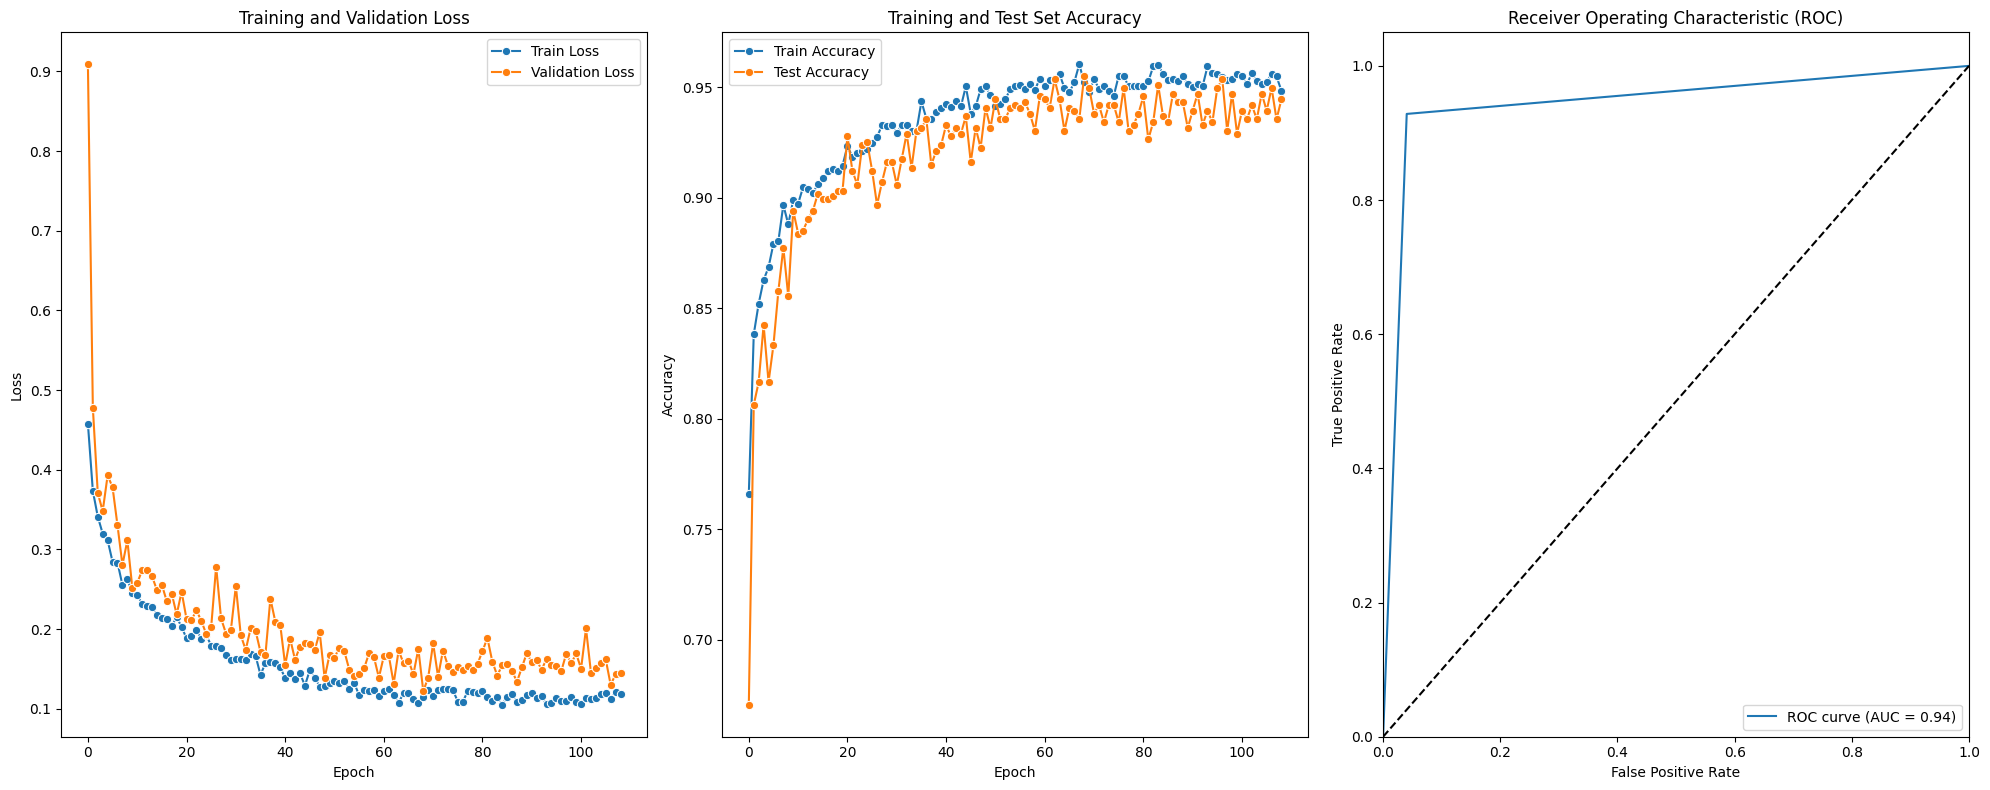

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.nn.utils import clip_grad_norm_
import timm
from tqdm import tqdm
import numpy as np
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc


# Initialize lists to store per-epoch metrics
train_losses = []
val_losses = []
train_accuracies = []  # New list for train accuracies
test_accuracies = []  # Renamed accuracies to test_accuracies for clarity
learning_rates = []


# [Load your data and define transformations...]

# Load a pretrained ViT model from timm
model_name = "resnet10t.c3_in1k"  # Example model name, change as per need
model = timm.create_model(model_name, pretrained=True, num_classes=2)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Initialize the optimizer, scheduler, and loss function
optimizer = optim.AdamW(model.parameters(), lr=0.0003, weight_decay=1e-5)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)
criterion = nn.CrossEntropyLoss()

num_epochs = 200
best_loss = float('inf')
patience = 40
counter = 0

# Training loop
for epoch in tqdm(range(num_epochs), desc='Training', unit='epoch'):
    model.train()
    total_loss = 0.0
    train_preds = []
    train_targets = []
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        total_loss += loss.item()

        # Collect training predictions and targets for accuracy calculation
        train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
        train_targets.extend(labels.cpu().numpy())

    train_accuracy = accuracy_score(train_targets, train_preds)
    train_accuracies.append(train_accuracy)


    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation step
    model.eval()
    val_loss = 0.0
    val_preds = []
    val_targets = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            val_loss += criterion(outputs, labels).item()
            val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            val_targets.extend(labels.cpu().numpy())

    

    # Calculate accuracy
  
    
    avg_val_loss = val_loss / len(test_loader)
    val_losses.append(avg_val_loss)
    scheduler.step(avg_val_loss)
    
    # Track learning rate
    current_lr = optimizer.param_groups[0]['lr']
    learning_rates.append(current_lr)

    # Calculate and store accuracy
    test_accuracy = accuracy_score(val_targets, val_preds)
    test_accuracies.append(test_accuracy)

    # Logging (updated to include train_accuracy)
    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")


    # Early stopping and model saving
    if avg_val_loss < best_loss:
        best_loss = avg_val_loss
        torch.save(model.state_dict(), 'binary_classification.pth')
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping")
            break

    if epoch % 10 == 0:
        torch.save(model.state_dict(), f'model_epoch_{epoch}.pth')
print("Training Complete")

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(val_targets, val_preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(20, 8)) 

# Plot for losses
plt.subplot(1, 3, 1)  # This specifies a 1 row, 3 column grid of subplots, and we're drawing the first one now
sns.lineplot(data = train_losses, label='Train Loss', marker='o')
sns.lineplot(data = val_losses, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot for accuracy
plt.subplot(1, 3, 2)  # This specifies the same grid, but we're drawing the second plot now
sns.lineplot(data = train_accuracies,  label='Train Accuracy', marker='o')
sns.lineplot(data = test_accuracies, label='Test Accuracy', marker='o')
plt.title('Training and Test Set Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot for ROC curve
plt.subplot(1, 3, 3)  # This specifies the same grid, but we're drawing the third plot now
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

plt.tight_layout()  # This adjusts subplot params to give some padding and prevent overlap
plt.savefig('training_accuracy_plots_with_roc.png', dpi=300)  # Save the figure in high quality
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

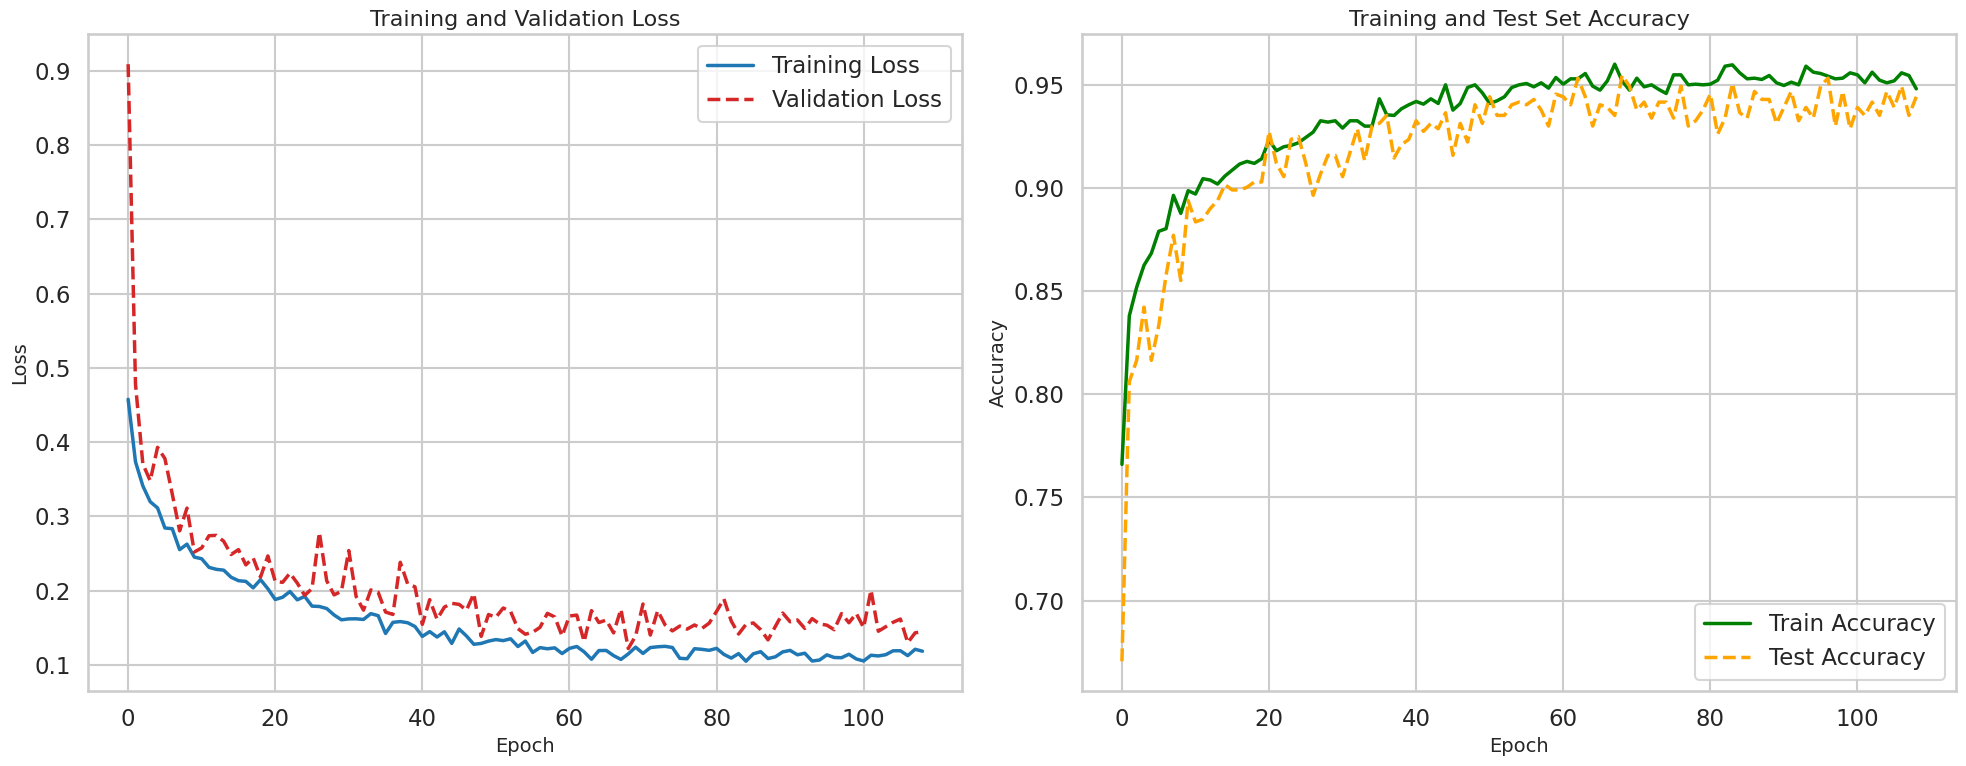

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming train_losses, val_losses, train_accuracies, and test_accuracies are defined somewhere in your code.
# Also assuming you have an 'epochs' list or array that corresponds to the number of epochs.
epochs = list(range(len(train_losses)))  # Creating a list of epochs based on the length of train_losses
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(20, 8)) 

# Plot for losses
plt.subplot(1, 2, 1)  # This specifies a 1 row, 2 column grid of subplots, and we're drawing the first one now
sns.lineplot(x=epochs, y=train_losses, label='Training Loss', color='tab:blue', linewidth=2.5)
sns.lineplot(x=epochs, y=val_losses, label='Validation Loss', color='tab:red', linewidth=2.5, linestyle='--')
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()

# Plot for accuracy
plt.subplot(1, 2, 2)  # This specifies the same grid, but we're drawing the second plot now
sns.lineplot(x=epochs, y=train_accuracies, label='Train Accuracy', color='green', linewidth=2.5)
sns.lineplot(x=epochs, y=test_accuracies, label='Test Accuracy', color='orange', linewidth=2.5, linestyle='--')
plt.title('Training and Test Set Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()

plt.tight_layout()  # This adjusts subplot params to give some padding and prevent overlap
plt.savefig('training_accuracy_plots.png', dpi=300)  # Save the figure in high quality
plt.show()


In [7]:
!zip -r deciscion2.zip /kaggle/working

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/model_epoch_60.pth (deflated 7%)
  adding: kaggle/working/model_epoch_40.pth (deflated 7%)
  adding: kaggle/working/model_epoch_100.pth (deflated 7%)
  adding: kaggle/working/model_epoch_50.pth (deflated 7%)
  adding: kaggle/working/model_epoch_70.pth (deflated 7%)
  adding: kaggle/working/model_epoch_0.pth (deflated 7%)
  adding: kaggle/working/model_epoch_90.pth (deflated 7%)
  adding: kaggle/working/model_epoch_30.pth (deflated 7%)
  adding: kaggle/working/binary_classification.pth (deflated 7%)
  adding: kaggle/working/model_epoch_80.pth (deflated 7%)
  adding: kaggle/working/.virtual_documents/ (stored 0%)
  adding: kaggle/working/model_epoch_10.pth (deflated 7%)
  adding: kaggle/working/training_accuracy_plots.png (deflated 14%)
  adding: kaggle/working/model_epoch_20.pth (deflated 7%)
  adding: kaggle/working/training_accuracy_plots_with_roc.png (deflated 15%)


In [8]:
from IPython.display import FileLink
FileLink(r'deciscion2.zip')

/kaggle/working/deciscion2.zip